# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [2]:
df_train = pd.read_csv('Training.csv')
df_train_copy = df_train.copy()

# EDA

In [3]:
#Displaying first 5 rows of dataset
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
#Dataset shape
df_train.shape

(4920, 134)

In [5]:
df_train.size

659280

In [6]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [7]:
# Checking for duplicates
duplicate = df_train.duplicated().sum()
print(f'Our tarining dataset has {duplicate} duplicated row')

Our tarining dataset has 4616 duplicated row


In [8]:
# checking for null values in the dataset
df_null = df_train.isna().sum().sum()
print(f'The dataset has {df_null} null variable')

The dataset has 4920 null variable


In [9]:
#Summary statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
yellow_crust_ooze,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [10]:
df_train.describe(exclude = np.number).T

,count,unique,top,freq
prognosis,4920,41,Fungal infection,120


In [11]:
df_train.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object

## a. Data processing

In [12]:
# Dropping columns with any missing values
df_train.dropna(axis = 1, inplace = True)
df_train.isna().sum().sum()

0

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


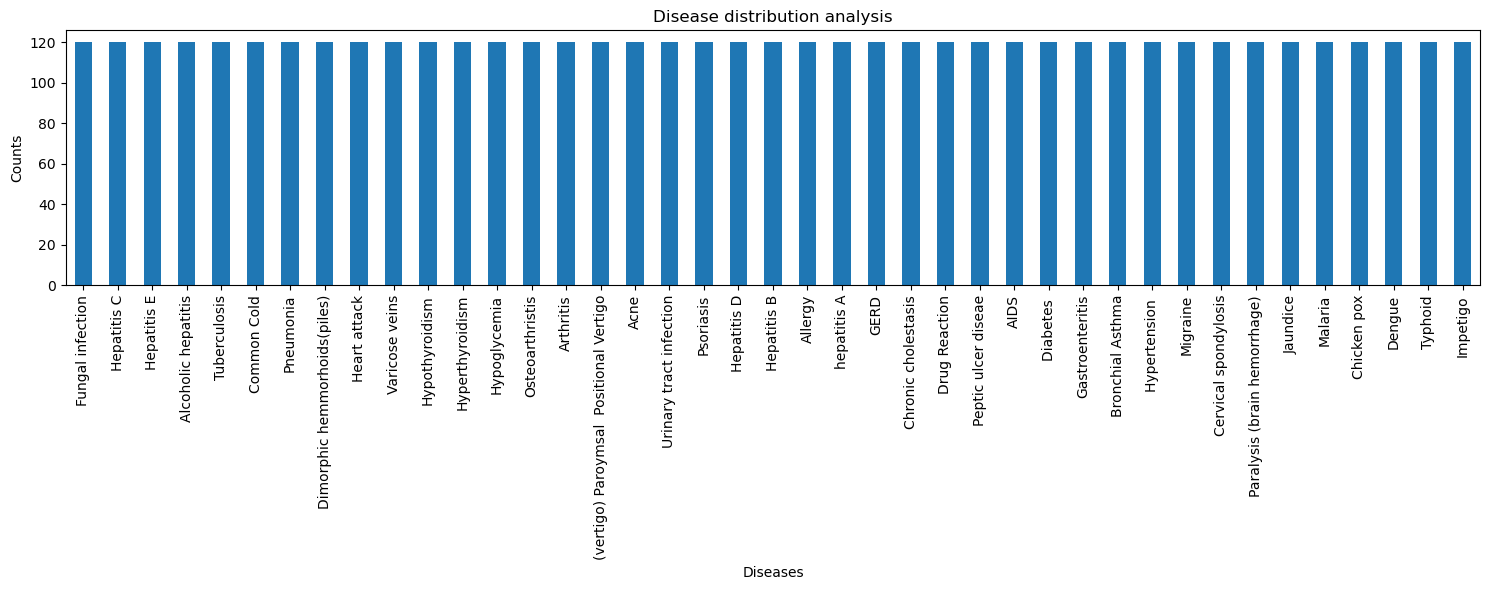

In [14]:
# Determining if dataset is balanced
plt.figure(figsize=(15,6))
disease_counts = df_train['prognosis'].value_counts().plot(kind = 'bar')
plt.xlabel('Diseases')
plt.ylabel('Counts')
plt.title('Disease distribution analysis')
plt.tight_layout()
plt.show()

From the plot, we can see that the dataset is balanced, with exactly 120 samples for each disease, so no further balancing is needed. The prognosis column, which is our target, is currently in an object datatype format. This format isn't suitable for training a machine learning model. Therefore, we will use a label encoder to convert the prognosis column into numerical format. The label encoder transforms the labels into numerical values by assigning a unique index to each label. If there are n labels, the assigned numbers will range from 0 to n-1.

## d. Encoding

In [15]:
# encoding target varible prognosis using labelencoder
label_encoder = LabelEncoder()
df_train['prognosis'] = label_encoder.fit_transform(df_train['prognosis'])

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int32(1), int64(132)
memory usage: 5.0 MB


# Modeling

In [17]:
X = df_train.drop(columns = 'prognosis')
y = df_train['prognosis']

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 24 )
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((3690, 132), (1230, 132), (3690,), (1230,))

## a. Using K-Fold Cross-Validation for model selection 

In [19]:
def score_matrix(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models  = {
    "SVC":SVC(), 
    "Gaussian Naive Bayes Classifier":GaussianNB(), 
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    score = cross_val_score(model, X, y,  cv = 10, n_jobs = -1, scoring = score_matrix)
    
    print('*' * 100)
    print(f'Model : {model_name}')
    print(f'Scores: {score}')
    print(f'Mean score: {np.mean(score)}')

****************************************************************************************************
Model : SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
****************************************************************************************************
Model : Gaussian Naive Bayes Classifier
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
****************************************************************************************************
Model : Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0


## b. Building robust classifier by combining all models

Accuracy on train data by SVC: 100.00%
Accuracy on test data by SVC: 100.00%


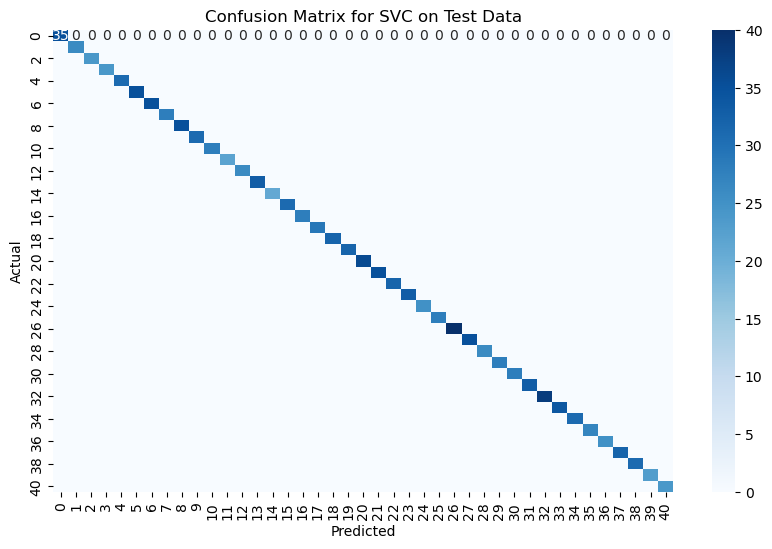

Accuracy on train data by Gaussian Naive Bayes Classifier: 100.00%
Accuracy on test data by Gaussian Naive Bayes Classifier: 100.00%


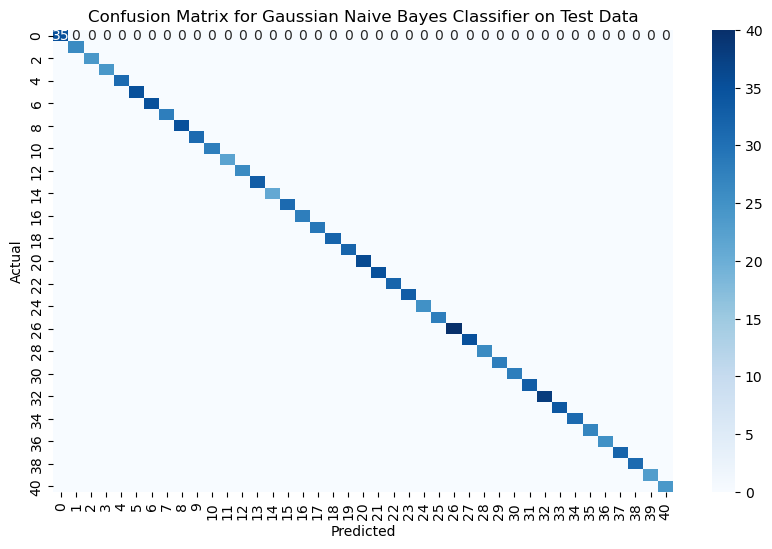

Accuracy on train data by Random Forest: 100.00%
Accuracy on test data by Random Forest: 100.00%


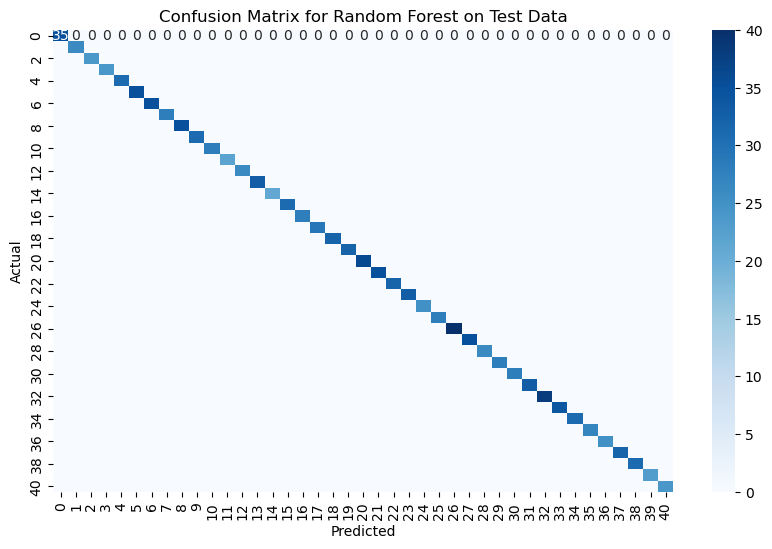

In [20]:
for model_name in models:
    model = models[model_name]
    model_fit = model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    train_preds = model.predict(X_train)
    conf_matrix = confusion_matrix(y_test, test_preds)
    accur_score_train = accuracy_score(y_train, train_preds)
    accur_score_test = accuracy_score(y_test, test_preds)
    
    print(f"Accuracy on train data by {model_name}: {accur_score_train * 100:.2f}%")
    print(f"Accuracy on test data by {model_name}: {accur_score_test * 100:.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name} on Test Data")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Model Fitting to Test dataset

## a. Importing test dataset

In [21]:
df_test = pd.read_csv('training.csv')
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [22]:
# Checking for missing varibles
df_test.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [23]:
# Dropping missing columns
df_test.dropna(axis = 1, inplace = True)
df_test.isna().sum().sum()

0

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [25]:
# Encoding target varibe prognosis
df_test['prognosis'] = label_encoder.transform(df_test['prognosis'])
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [26]:
# Splitting the test dataset into target variable y and dependent variables X
test_X = df_test.drop(columns='prognosis')
test_Y = df_test['prognosis']

# Define the models in a dictionary
model_final = {
    "SVC": SVC(),
    "Gaussian Naive Bayes Classifier": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Training the models on the whole dataset
for model_name_final, model_df_final in model_final.items():
    model_df_final.fit(X, y)

# Making predictions with all models and storing them
all_preds = []
for model_name_final, model_df_final in model_final.items():
    model_pred = model_df_final.predict(test_X)
    all_preds.append(model_pred)

# Taking the mode of predictions from all classifiers
final_preds = []
for i, predictions in enumerate(zip(*all_preds)):
    prediction_mode = mode(predictions)
    print(f"Index {i}, Predictions: {predictions}, Mode: {prediction_mode}")
    
    # Extracting the mode value correctly
    final_preds.append(prediction_mode.mode[0])

# Accuracy and confusion matrix
accuracy = accuracy_score(test_Y, final_preds)
print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Index 0, Predictions: (15, 15, 15), Mode: ModeResult(mode=15, count=3)


IndexError: invalid index to scalar variable.